### Sales Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import datetime
%matplotlib inline

In [2]:
# use glob to get all the csv files in the folder
path = os.getcwd()
csv_files = glob.glob(os.path.join(path, "*.csv"))

##### Merging 12 months of sales data into a single file

In [19]:

#files = [file for file in os.listdir('C:/Users/debbar/Desktop/Data Analysis Projects/Sales_Data')]

# loop over the list of csv files
all_months_data = pd.DataFrame()

for file in csv_files:
    df = pd.read_csv(file)
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.to_csv("all_data.csv", index=False)

In [20]:
all_data = pd.read_csv('all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [21]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560550 entries, 0 to 560549
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          558915 non-null  object
 1   Product           558915 non-null  object
 2   Quantity Ordered  558915 non-null  object
 3   Price Each        558915 non-null  object
 4   Order Date        558915 non-null  object
 5   Purchase Address  558915 non-null  object
dtypes: object(6)
memory usage: 25.7+ MB


##### Drop rows of NAN

In [22]:
all_data = all_data.dropna(how='all')

##### Augment data with additional columns

In [23]:
# Adding month column

all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data['Month'] = all_data['Order Date'].str[0:2].astype('int32')
all_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4


In [24]:
# Adding sales column

all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) # make int
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])  # make float
all_data['Sales'] = all_data['Price Each'] * all_data['Quantity Ordered']
all_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00


In [25]:
all_data[all_data.Sales == all_data.Sales.max()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
4717,181069,Macbook Pro Laptop,2,1700.0,04/27/19 21:01,"668 Park St, San Francisco, CA 94016",4,3400.0
5219,181544,Macbook Pro Laptop,2,1700.0,04/22/19 12:48,"731 11th St, New York City, NY 10001",4,3400.0
92026,210292,Macbook Pro Laptop,2,1700.0,06/08/19 09:00,"953 Ridge St, San Francisco, CA 94016",6,3400.0
127265,200528,Macbook Pro Laptop,2,1700.0,05/13/19 13:40,"643 4th St, Boston, MA 02215",5,3400.0
191567,181069,Macbook Pro Laptop,2,1700.0,04/27/19 21:01,"668 Park St, San Francisco, CA 94016",4,3400.0
192069,181544,Macbook Pro Laptop,2,1700.0,04/22/19 12:48,"731 11th St, New York City, NY 10001",4,3400.0
278876,210292,Macbook Pro Laptop,2,1700.0,06/08/19 09:00,"953 Ridge St, San Francisco, CA 94016",6,3400.0
314115,200528,Macbook Pro Laptop,2,1700.0,05/13/19 13:40,"643 4th St, Boston, MA 02215",5,3400.0
378417,181069,Macbook Pro Laptop,2,1700.0,04/27/19 21:01,"668 Park St, San Francisco, CA 94016",4,3400.0
378919,181544,Macbook Pro Laptop,2,1700.0,04/22/19 12:48,"731 11th St, New York City, NY 10001",4,3400.0


In [26]:
all_data.groupby('Month', as_index=False).Sales.sum().max()

Month          12.00
Sales    13840330.02
dtype: float64

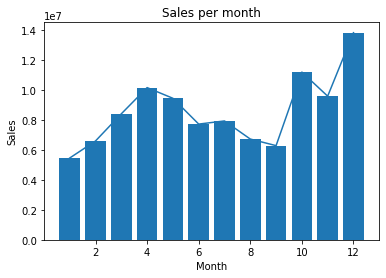

In [27]:
df = all_data.groupby('Month').Sales.sum()

sns.lineplot(x=df.index, y=df, data=df).set(title='Sales per month')

plt.bar(df.index,df)
plt.show()

In [28]:
all_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00


##### Adding city column

In [29]:
#all_data['Purchase Address'].str.split(', ')[0][1:]

all_data['City'] = all_data['Purchase Address'].apply(lambda city : f"{city.split(',')[1]} {city.split(',')[2].split(' ')[1]}")

#def get_city(address):
#    return address.split(',')[1]

#def get_state(address):
#    return address.split(',')[2].split(' ')[1]

#all_data['City'] = all_data['Purchase Address'].apply(lambda item : f"{get_city(item)} ({get_state(item)})")
#all_data.head(3)

In [30]:
all_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA


##### City having highest number of sales

In [31]:
all_data.groupby('City').sum().sort_values('Sales', ascending=False)

,Quantity Ordered,Price Each,Month,Sales
City,,,,
San Francisco CA,150717,24634385.22,946560,24786611.73
Los Angeles CA,99867,16264305.69,624975,16357712.40
New York City NY,83796,13906112.49,527223,13992952.29
Boston MA,67584,10912229.31,423336,10984926.03
Atlanta GA,49806,8339724.60,314382,8386495.74
Dallas TX,50190,8257883.46,313860,8303926.20
Seattle WA,49659,8199888.03,314823,8243266.44
Portland OR,33909,5581674.66,211863,5612197.02
Austin TX,33459,5429620.83,209487,5458745.25


[Text(0.5, 1.0, 'Distribution of Sales per city')]

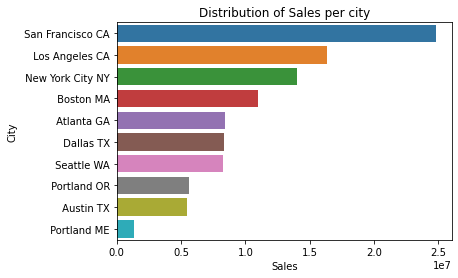

In [32]:
sns.barplot(x=all_data.groupby('City').sum().sort_values('Sales', ascending=False).Sales, 
            y=all_data.groupby('City').sum().sort_values('Sales', ascending=False).index).set(title='Distribution of Sales per city')

In [33]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


##### Adding Time column

In [34]:
# Convert time from string to timestamp format

all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [77]:
all_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)


In [78]:
all_data['Order Hour'] = all_data['Order Date'].dt.hour

In [82]:
all_data.groupby('Order Hour').sum()

,Quantity Ordered,Price Each,Month,Sales
Order Hour,,,,
0,4428,709296.70,27554,713721.27
1,2619,458490.00,16657,460866.88
2,1398,233833.64,8507,234851.44
3,928,144726.42,5904,145757.89
4,937,162058.18,6148,162661.01
5,1493,229621.21,9301,230679.82
6,2810,445000.11,17539,448113.00
7,4556,740568.11,28850,744854.12
8,7002,1185970.62,43626,1192348.97


[Text(0.5, 1.0, 'Distribution of Sales per hour')]

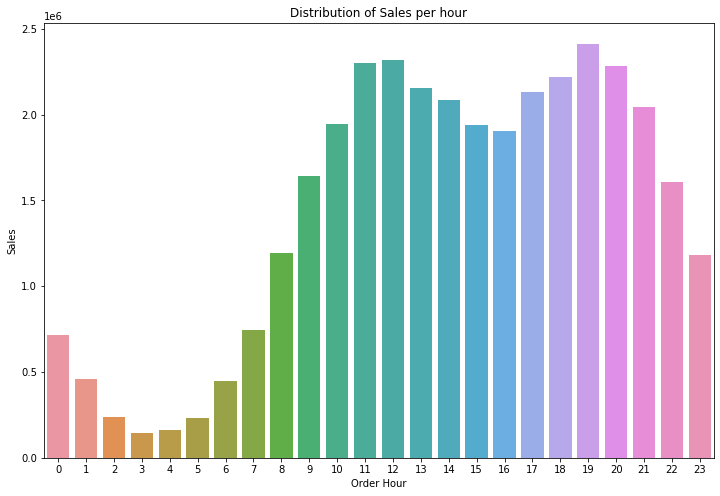

In [90]:
fig = plt.figure(figsize=(12,8))
sns.barplot(y=all_data.groupby('Order Hour').sum().Sales, 
            x=all_data.groupby('Order Hour').sum().index, 
            data=all_data.groupby('Order Hour').sum()).set(title='Distribution of Sales per hour')


In [91]:
all_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Order Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14


##### Products most often sold together

In [104]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x:', '.join(x))
df = df[['Order ID', 'Grouped']].drop_duplicates()
df

C:\Users\debbar\AppData\Local\Temp/ipykernel_9344/752923872.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x:', '.join(x))


,Order ID,Grouped
3,176560,"Google Phone, Wired Headphones"
18,176574,"Google Phone, USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones, Bose SoundSport He..."
32,176586,"AAA Batteries (4-pack), Google Phone"
119,176672,"Lightning Charging Cable, USB-C Charging Cable"
...,...,...
186781,259296,"Apple Airpods Headphones, Apple Airpods Headph..."
186783,259297,"iPhone, Lightning Charging Cable, Lightning Ch..."
186791,259303,"34in Ultrawide Monitor, AA Batteries (4-pack)"
186803,259314,"Wired Headphones, AAA Batteries (4-pack)"


In [105]:
from itertools import combinations
from collections import Counter

In [114]:
count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
for key, value in count.most_common(10):
    print(key, value)

('iPhone', ' Lightning Charging Cable') 1005
('Google Phone', ' USB-C Charging Cable') 987
('iPhone', ' Wired Headphones') 447
('Google Phone', ' Wired Headphones') 414
('Vareebadd Phone', ' USB-C Charging Cable') 361
('iPhone', ' Apple Airpods Headphones') 360
('Google Phone', ' Bose SoundSport Headphones') 220
('Vareebadd Phone', ' Wired Headphones') 143
(' USB-C Charging Cable', ' Wired Headphones') 120
('Vareebadd Phone', ' Bose SoundSport Headphones') 80


In [115]:
all_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Order Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22


In [131]:
product_group = all_data.groupby('Product')
product_group.sum()['Quantity Ordered']

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, '20in Monitor'),
  Text(1, 0, '27in 4K Gaming Monitor'),
  Text(2, 0, '27in FHD Monitor'),
  Text(3, 0, '34in Ultrawide Monitor'),
  Text(4, 0, 'AA Batteries (4-pack)'),
  Text(5, 0, 'AAA Batteries (4-pack)'),
  Text(6, 0, 'Apple Airpods Headphones'),
  Text(7, 0, 'Bose SoundSport Headphones'),
  Text(8, 0, 'Flatscreen TV'),
  Text(9, 0, 'Google Phone'),
  Text(10, 0, 'LG Dryer'),
  Text(11, 0, 'LG Washing Machine'),
  Text(12, 0, 'Lightning Charging Cable'),
  Text(13, 0, 'Macbook Pro Laptop'),
  Text(14, 0, 'ThinkPad Laptop'),
  Text(15, 0, 'USB-C Charging Cable'),
  Text(16, 0, 'Vareebadd Phone'),
  Text(17, 0, 'Wired Headphones'),
  Text(18, 0, 'iPhone')])

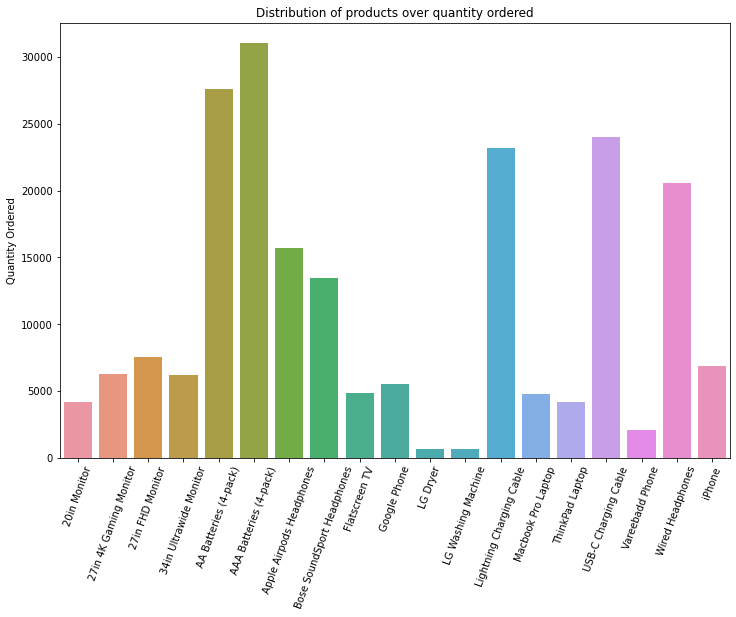

In [171]:
products = [product for product, df in product_group]

plt.figure(figsize=(12,8))
sns.barplot(x=products, y=product_group.sum()['Quantity Ordered']).set(title='Distribution of products over quantity ordered')
plt.xticks(rotation=70)
#plt.xticks(rotation='vertical')

In [148]:
prices = all_data.groupby('Product').mean()['Price Each']
prices


Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

Text(0.5, 1.0, 'Distribution of products over mean price and quantity ordered')

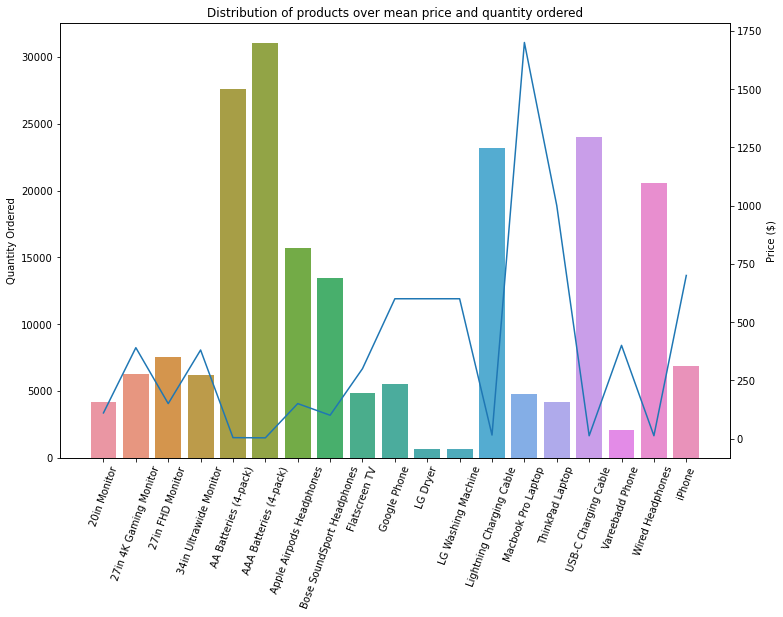

In [170]:
fig,ax1 = plt.subplots(figsize=(12,8))

f1=sns.barplot(x=products, 
               y=product_group.sum()['Quantity Ordered'],
               ax=ax1)
ax2 = ax1.twinx()
f2=sns.lineplot(x=products,
                y=prices,
                ax=ax2)
ax2.set_ylabel('Price ($)')
#f1.set_xticklabels(f1.get_xticklabels(),rotation = 70)
f1.set_xticklabels(products,rotation = 70)
f1.set_title('Distribution of products over mean price and quantity ordered')